<a href="https://colab.research.google.com/github/leoitcode/tv-recognizer/blob/master/Logo_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brazil's Tv Stations Logos Program


### This python program apply the data augmentation on TvStations Logos.
### It uses Fast.AI library on Google Colaboratory.

**FOR BETTER VISUALIZATION LOOK AT GOOGLE COLAB

Objectives and tools:

- Improve the accuracy on detection.
  - vision.transform (fastai image transformation library for Data Augmentation)
  
- Image training analysis
  - cnn_learner (function to create a Convolution Neural Network Learner)
  
- Check the results using:
  - plot_top_losses (function Check the most incorrect images predicted)
  - Confusion Map (function to check what predicitons match with )
  - Heat Map (Check the area levels for prediction)

#

## Get Fast.AI library and setup for Colab



In [0]:
pip install git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-47vy7t86
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-47vy7t86
  Created wheel for fastai: filename=fastai-1.0.58.dev0-cp36-none-any.whl size=233425 sha256=72e8364bfb8ff3e260935c6991c0c5605daf909696b6155caf9ec7812d8fac62
  Stored in directory: /tmp/pip-ephem-wheel-cache-wwwbi3yt/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai
  Found existing installation: fastai 1.0.55
    Uninstalling fastai-1.0.55:
      Successfully uninstalled fastai-1.0.55


In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


# 

### Give to Google Colaboratory permission to access Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "/content/gdrive/My Drive/Emissoras/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls '/content/gdrive/My Drive/Emissoras/'

augmented_images  Band_123.jpg	 Record_33.jpg	 RedeTV_061.jpg  RedeTV_185.jpg
Band_001.jpg	  Band_124.jpg	 Record_34.jpg	 RedeTV_062.jpg  RedeTV_186.jpg
Band_002.jpg	  Band_125.jpg	 Record_35.jpg	 RedeTV_064.jpg  RedeTV_187.jpg
Band_003.jpg	  Band_126.jpg	 Record_36.jpg	 RedeTV_065.jpg  RedeTV_188.jpg
Band_004.jpg	  Band_127.jpg	 Record_37.jpg	 RedeTV_066.jpg  RedeTV_189.jpg
Band_005.jpg	  Band_128.jpg	 Record_38.jpg	 RedeTV_067.jpg  RedeTV_190.jpg
Band_006.jpg	  Band_129.jpg	 Record_39.jpg	 RedeTV_068.jpg  RedeTV_191.jpg
Band_007.jpg	  Globo_01.jpg	 Record_40.jpg	 RedeTV_069.jpg  RedeTV_192.jpg
Band_008.jpg	  Globo_02.jpg	 Record_41.jpg	 RedeTV_070.jpg  RedeTV_193.jpg
Band_009.jpg	  Globo_03.jpg	 Record_42.jpg	 RedeTV_072.jpg  RedeTV_194.jpg
Band_010.jpg	  Globo_04.jpg	 Record_43.jpg	 RedeTV_073.jpg  RedeTV_195.jpg
Band_011.jpg	  Globo_05.jpg	 Record_44.jpg	 RedeTV_074.jpg  RedeTV_196.jpg
Band_012.jpg	  Globo_06.jpg	 Record_45.jpg	 RedeTV_075.jpg  RedeTV_197.jpg
Band_013.jpg	  Globo_0

#

## Data Augmentation process

### Import the Fast.AI Library

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [0]:
#Batch Size
bs = 64

In [0]:
#Documentation of get_transforms Fastai
doc(get_transforms)

#

### Configuration of get_transforms to rotate images 35, zoom 1.1, lighting in 0.4, warp 0.2, and probability of lighting and affine 1.0

In [0]:
tfms = get_transforms(max_rotate=35, max_zoom=1.1, max_lighting=0.4, max_warp=0.2,
                      p_affine=1., p_lighting=1.)

#

### Get images from folder and split 80% to train and 20% to test, apply the transformations on images.

In [0]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2, seed=2)

In [0]:
src

ItemLists;

Train: ImageList (481 items)
Image (3, 132, 381),Image (3, 225, 225),Image (3, 162, 310),Image (3, 191, 264),Image (3, 168, 300)
Path: /content/gdrive/My Drive/Emissoras;

Valid: ImageList (120 items)
Image (3, 400, 400),Image (3, 240, 311),Image (3, 720, 1280),Image (3, 119, 242),Image (3, 320, 550)
Path: /content/gdrive/My Drive/Emissoras;

Test: None

In [0]:
#Apply Transformations on Images
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')
           .transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [0]:
data = get_data(224, bs, 'reflection')

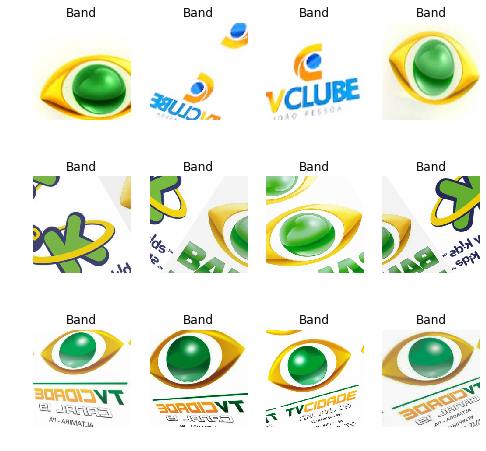

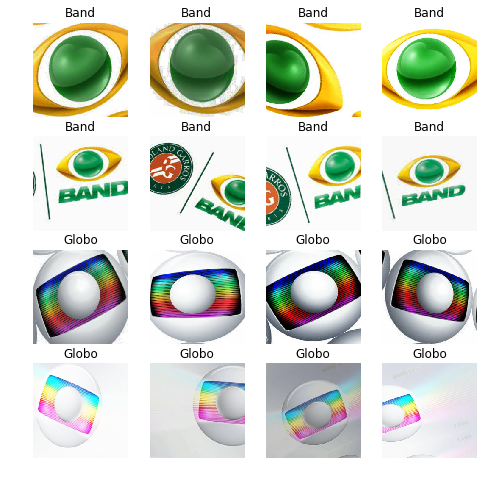

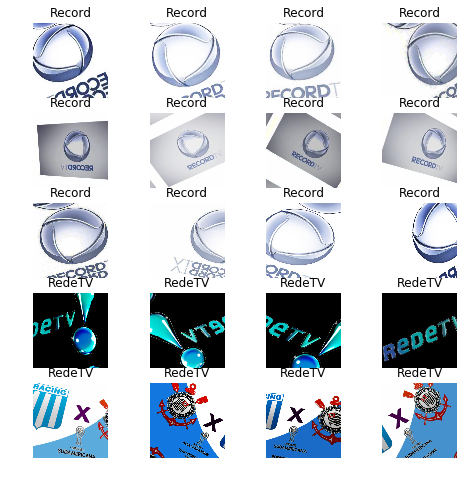

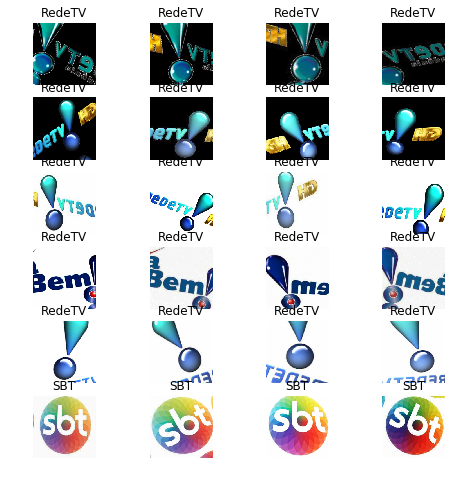

In [0]:
#Show transformed images
img_pos = 0

def _plot(i,j,ax):
    global img_pos
    x,y = data.train_ds[img_pos]
    x.show(ax, y=y)
    if(j==3):
      img_pos+=25

for m in range(3,7):
  plot_multi(_plot, m, 4, figsize=(8,8))

In [0]:
data = get_data(224,bs)

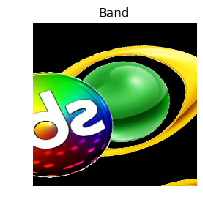

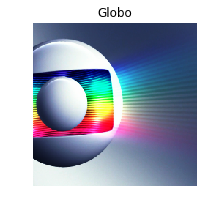

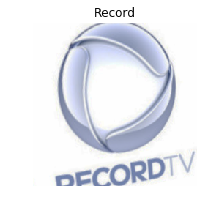

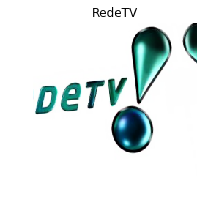

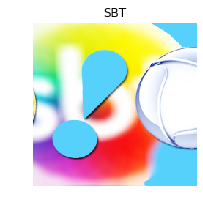

In [0]:
for i in range(21,500,100):
  x,y = data.train_ds[i]
  x.show(y=y)

In [0]:
data = get_data(352,16)

#

## Training Process

In [0]:
#Create Convolution Neural Network Learner (cnn_leaner)
learn = cnn_learner(data, models.resnet34, metrics=error_rate, bn_final=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 111984205.42it/s]


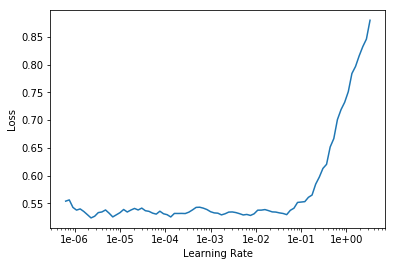

In [0]:
#Find the bests Learning Rates
learn.lr_find()
learn.recorder.plot()

In [0]:
#Train
learn.fit_one_cycle(3, slice(1e-2), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,1.165470,0.355134,0.041667,01:58
1,0.947537,0.256475,0.025000,00:16
2,0.765956,0.252595,0.033333,00:15


In [0]:
#Unfreeze
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,0.585981,0.290514,0.025000,00:16
1,0.569459,0.287301,0.016667,00:16


In [0]:
data = get_data(352,bs)
learn.data = data

In [0]:
#Train
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.445969,0.302369,0.016667,00:15
1,0.450612,0.311058,0.016667,00:16


In [0]:
#Save Trained Model
learn.save('broad')

In [0]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 176, 176]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 176, 176]       128        True      
______________________________________________________________________
ReLU                 [64, 176, 176]       0          False     
______________________________________________________________________
MaxPool2d            [64, 88, 88]         0          False     
______________________________________________________________________
Conv2d               [64, 88, 88]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 88, 88]         128        True      
______________________________________________________________________
ReLU                 [64, 88, 88]         0          False     
___________________________________________________

#

## Augmented and Trained model Analysis

In [0]:
inf_learn = ClassificationInterpretation.from_learner(learn)

#

### Top Losses

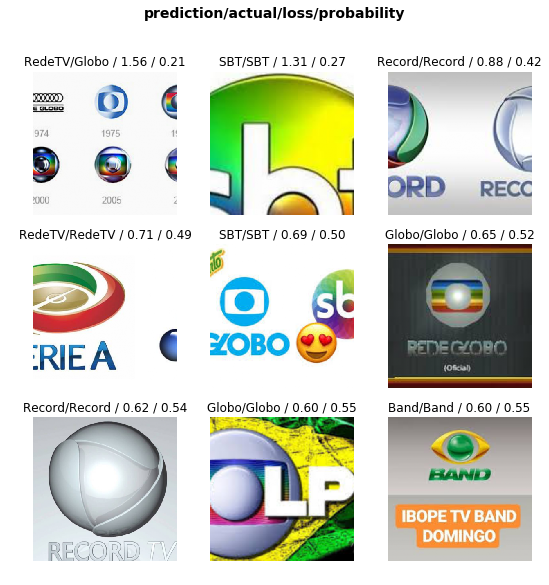

In [0]:
#Check the most incorrect images
inf_learn.plot_top_losses(9, figsize=(9,9))

#

### Confusion Matrix

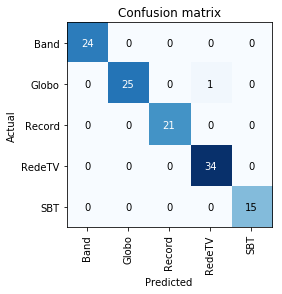

In [0]:
#Confusion matrix to get predictions results
inf_learn.plot_confusion_matrix()

#

### Creating Kernel to analyze the output image used for prediction



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Category Record

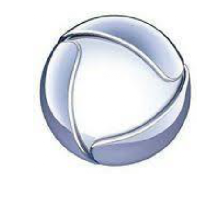

In [0]:
idx=29
x,y = data.valid_ds[idx]
x.show()
data.valid_ds.y[idx]

In [0]:
#One dimension kernel expanded to 3 dimesions
k = tensor([
    [0.  ,-5/3,1],
    [-5/3,-5/3,1],
    [1.  ,1   ,1],
]).expand(1,3,3,3)/6

In [0]:
#3x3x3 kernel
k

tensor([[[[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]]]])

In [0]:
k.shape

torch.Size([1, 3, 3, 3])

In [0]:
t = data.valid_ds[29][0].data; t.shape

torch.Size([3, 352, 352])

In [0]:
#Get de modified image from 3x3x3 kernel
edge = F.conv2d(t[None], k)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


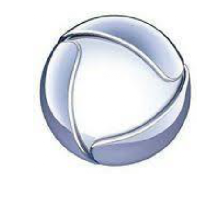

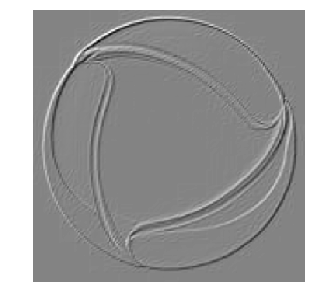

In [0]:
#Show images
x.show()
show_image(edge[0], figsize=(5,5));

## Creating Heatmap from Trained model (m)

In [0]:
learn = learn.load('broad')

In [0]:
#Evaluation from trained model
m = learn.model.eval();

In [0]:
#Function for get image x and tensor xb
def image_list(num_img):
  x,y = data.valid_ds[num_img]
  xb,_ = data.one_item(x)
  xb_im = Image(data.denorm(xb)[0])
  xb = xb.cuda()
  return x, xb, xb_im

In [0]:
from fastai.callbacks.hooks import *

In [0]:
x, xb, xb_im = image_list(74)
x2, xb2, xb_im2 = image_list(51)

In [0]:
#Function return hooks from model's activations
def hooked_backward(xxb, cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xxb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [0]:
hook_a,hook_g = hooked_backward(xb)
hook_a2, hook_g2 = hooked_backward(xb2)

In [0]:
acts  = hook_a.stored[0].cpu()
acts2  = hook_a2.stored[0].cpu()
acts.shape

torch.Size([512, 11, 11])

In [0]:
#Average of 512 pixels to see what/where pixel is activated.
avg_acts = acts.mean(0)
avg_acts2 = acts2.mean(0)
avg_acts.shape

torch.Size([11, 11])

In [0]:
#Function to show de Heatmap (imshow) over image xxb_im
def show_heatmap(xxb_im, hm):
    _,ax = plt.subplots()
    xxb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              interpolation='bilinear', cmap='magma');

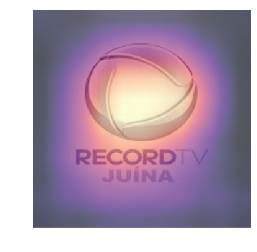

In [0]:
show_heatmap(xb_im, avg_acts)

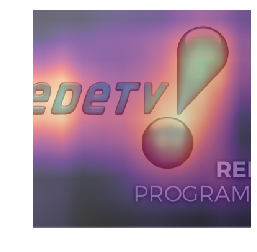

In [0]:
show_heatmap(xb_im2, avg_acts2)